In [6]:
install.packages("rsample")
install.packages("corrplot")
install.packages("Hmisc")
install.packages("tidyverse")
install.packages("broom")
install.packages("repr")
install.packages("ggplot2")
install.packages("caret")
install.packages("pdp")
install.packages("psych")
install.packages("earth")
install.packages("ggpubr")
install.packages('coefplot')
install.packages('ROCR')
install.packages('dplyr')
install.packages('rpart')
install.packages('rpart.plot')
install.packages('ipred')
install.packages('vip')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("Hmisc"):
“installation of package ‘Hmisc’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Upda

In [8]:
library(corrplot)
library("Hmisc")
library(tidyverse)  
library(broom)     
library(rsample)   
library(ggplot2)  
library(caret)     
library(pdp)      
library(psych)
library(earth)
library(ggpubr)
library(glmnet) 
library(coefplot)
library(ROCR)
library(dplyr) 
library(rpart)    
library(rpart.plot) 
library(ipred)       
library(vip)

In [73]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)
finance = read.csv("Finance.csv", skip = 1, header = TRUE)
finance$ID <- NULL
head(finance)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [74]:
finance$SEX <- as.factor(finance$SEX)
finance$EDUCATION <- as.factor(finance$EDUCATION)
finance$MARRIAGE <- as.factor(finance$MARRIAGE)
finance$default.payment.next.month <- as.factor(finance$default.payment.next.month)

In [75]:
table(finance$'default.payment.next.month')


    0     1 
23364  6636 

In [76]:
table(finance$'default.payment.next.month')/length(finance$'default.payment.next.month')


     0      1 
0.7788 0.2212 

In [77]:
finance.rcorr = rcorr(as.matrix(finance))
finance.rcorr

                           LIMIT_BAL   SEX EDUCATION MARRIAGE   AGE PAY_0 PAY_2
LIMIT_BAL                       1.00  0.02     -0.22    -0.11  0.14 -0.27 -0.30
SEX                             0.02  1.00      0.01    -0.03 -0.09 -0.06 -0.07
EDUCATION                      -0.22  0.01      1.00    -0.14  0.18  0.11  0.12
MARRIAGE                       -0.11 -0.03     -0.14     1.00 -0.41  0.02  0.02
AGE                             0.14 -0.09      0.18    -0.41  1.00 -0.04 -0.05
PAY_0                          -0.27 -0.06      0.11     0.02 -0.04  1.00  0.67
PAY_2                          -0.30 -0.07      0.12     0.02 -0.05  0.67  1.00
PAY_3                          -0.29 -0.07      0.11     0.03 -0.05  0.57  0.77
PAY_4                          -0.27 -0.06      0.11     0.03 -0.05  0.54  0.66
PAY_5                          -0.25 -0.06      0.10     0.04 -0.05  0.51  0.62
PAY_6                          -0.24 -0.04      0.08     0.03 -0.05  0.47  0.58
BILL_AMT1                       0.29 -0.

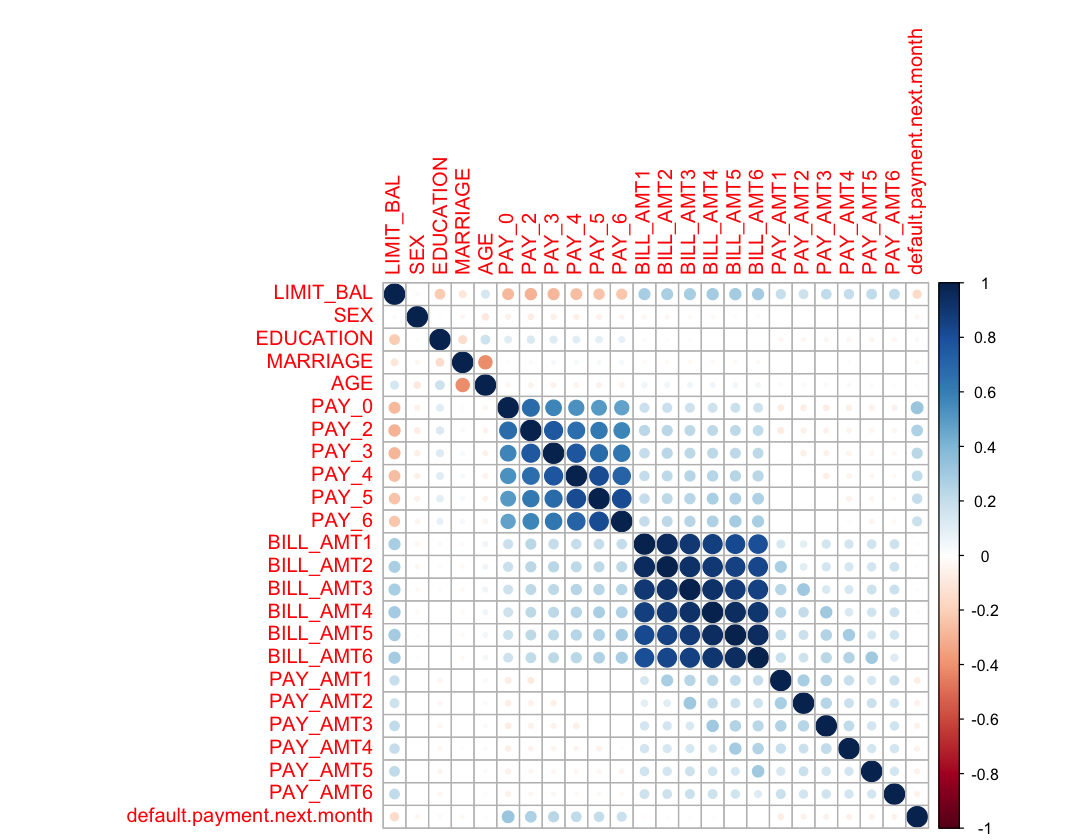

In [78]:
options(repr.plot.width = 9, repr.plot.height=7)
corrplot(finance.rcorr$r)

In [79]:
set.seed(123)
sample <- sample(c(TRUE, FALSE), nrow(finance), replace = T, prob = c(0.6,0.4))

In [80]:
#Create training and testing dataset
train <- finance[sample, ]
test <- finance[!sample, ]

In [81]:
head(train)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [82]:
head(test)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
11,200000,2,3,2,34,0,0,2,0,0,-1,11073,9787,5535,2513,1828,3731,2306,12,50,300,3738,66,0
13,630000,2,2,2,41,-1,0,-1,-1,-1,-1,12137,6500,6500,6500,6500,2870,1000,6500,6500,6500,2870,0,0


In [83]:
train_x <- model.matrix(default.payment.next.month ~ ., train)[, -1]
train_y <- (train$default.payment.next.month)
test_x <- model.matrix(default.payment.next.month ~ ., test)[, -1]
test_y <- (test$default.payment.next.month)

# LASSO Variable Selection

In [84]:
#Fit the lasso using the training data
set.seed(123)
fit.lasso = glmnet(train_x,train_y, family = "binomial", alpha=1)

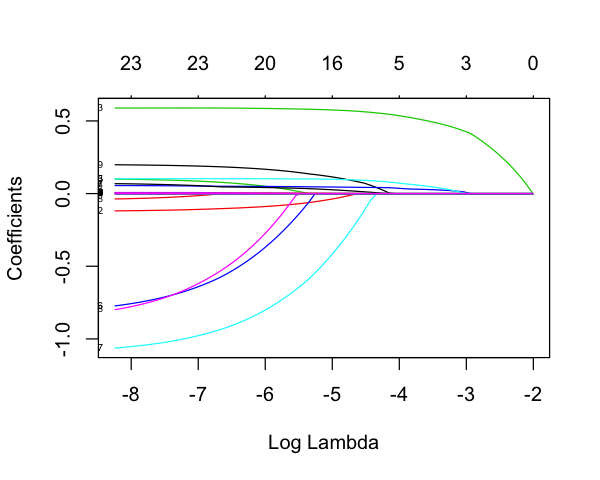

In [85]:
#Plot the LASSO variable selection for visualization
options(repr.plot.width=5, repr.plot.height=4)
plot(fit.lasso,xvar="lambda",label=TRUE)

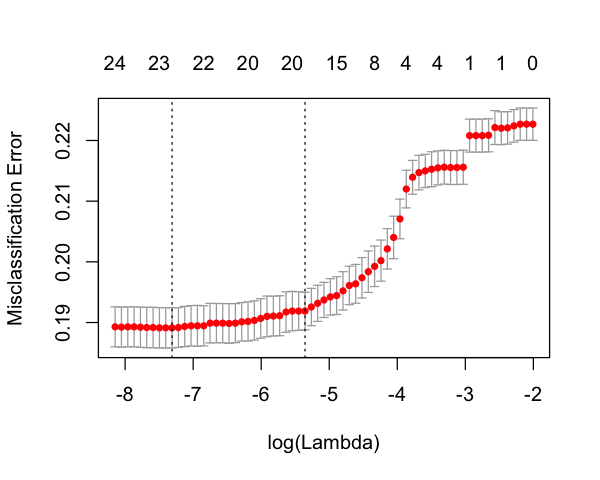

In [86]:
options(repr.plot.width=5, repr.plot.height=4)
#Perform cross validation with 10 folds to determine best lambda to use
set.seed(123)
cv.lasso = cv.glmnet(train_x,train_y, family= "binomial", alpha = 1, type.measure = 'class')
plot(cv.lasso)

In [87]:
min(cv.lasso$cvm)       #Minimum MSE
cv.lasso$lambda.min     #Lambda for this min MSE
cv.lasso$cvm[cv.lasso$lambda == cv.lasso$lambda.1se]  #1 st.error of min MSE
cv.lasso$lambda.1se  #Lambda for this MSE

[1] 0.1891233

[1] 0.0006689417

[1] 0.1918923

[1] 0.004719251

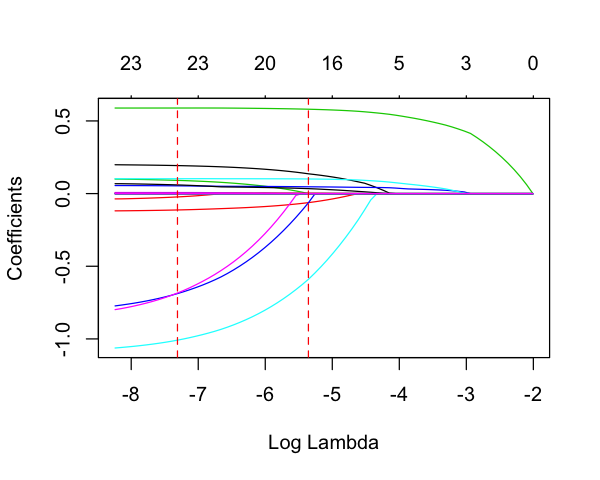

In [88]:
options(repr.plot.width=5, repr.plot.height=4)
#Plot variable selection graph along with lambda position to visualize variable selection
plot(fit.lasso, xvar = "lambda")
abline(v = log(cv.lasso$lambda.min), col = "red", lty = "dashed")
abline(v = log(cv.lasso$lambda.1se), col = "red", lty = "dashed")

In [89]:
#Coefficient values for variables after selection using lambda that is minimum MSE
coef(cv.lasso, s = cv.lasso$lambda.min)

31 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -1.260259e+00
LIMIT_BAL   -7.764732e-07
SEX2        -1.126835e-01
EDUCATION1   9.099339e-02
EDUCATION2   .           
EDUCATION3   .           
EDUCATION4  -6.880957e-01
EDUCATION5  -1.008593e+00
EDUCATION6  -6.842145e-01
MARRIAGE1    1.927466e-01
MARRIAGE2    .           
MARRIAGE3    .           
AGE          4.989931e-03
PAY_0        5.888407e-01
PAY_2        5.329117e-02
PAY_3        1.023574e-01
PAY_4        7.287911e-03
PAY_5        5.969987e-02
PAY_6       -2.293282e-02
BILL_AMT1   -2.252704e-06
BILL_AMT2    .           
BILL_AMT3    6.453318e-07
BILL_AMT4    .           
BILL_AMT5    .           
BILL_AMT6    5.244750e-07
PAY_AMT1    -8.996870e-06
PAY_AMT2    -8.665413e-06
PAY_AMT3    -2.567825e-06
PAY_AMT4    -2.572824e-06
PAY_AMT5    -4.020955e-06
PAY_AMT6    -2.655023e-06

In [90]:
#Coefficient values for variables after selection using lambda that is 1 s.e. from minimum MSE
coef(cv.lasso, s = cv.lasso$lambda.1se)

31 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -1.224993e+00
LIMIT_BAL   -7.347667e-07
SEX2        -6.231063e-02
EDUCATION1   8.902552e-05
EDUCATION2   .           
EDUCATION3   .           
EDUCATION4  -6.317414e-02
EDUCATION5  -5.899734e-01
EDUCATION6   .           
MARRIAGE1    1.361597e-01
MARRIAGE2    .           
MARRIAGE3    .           
AGE          2.850269e-03
PAY_0        5.805982e-01
PAY_2        4.678343e-02
PAY_3        1.005218e-01
PAY_4        1.646783e-04
PAY_5        3.414167e-02
PAY_6        .           
BILL_AMT1   -1.308318e-06
BILL_AMT2    .           
BILL_AMT3    .           
BILL_AMT4    .           
BILL_AMT5    .           
BILL_AMT6    .           
PAY_AMT1    -5.626133e-06
PAY_AMT2    -3.130823e-06
PAY_AMT3    -6.042185e-07
PAY_AMT4    -1.003661e-06
PAY_AMT5    -1.956441e-06
PAY_AMT6    -1.356710e-06

In [91]:
#Extract variables that remain after variable selection
variables = rownames(coef(cv.lasso, s = cv.lasso$lambda.1se))[coef(cv.lasso, s = cv.lasso$lambda.1se)[,1]!= 0]
variables

[1] "(Intercept)" "LIMIT_BAL"   "SEX2"        "EDUCATION1"  "EDUCATION4" 
 [6] "EDUCATION5"  "MARRIAGE1"   "AGE"         "PAY_0"       "PAY_2"      
[11] "PAY_3"       "PAY_4"       "PAY_5"       "BILL_AMT1"   "PAY_AMT1"   
[16] "PAY_AMT2"    "PAY_AMT3"    "PAY_AMT4"    "PAY_AMT5"    "PAY_AMT6"

In [92]:
#Create a modified dataset that only contains variables chosen in LASSO variable selection
finance_lasso = finance[,colnames(finance)%in%variables]
finance_lasso['SEX'] = finance['SEX']
finance_lasso['EDUCATION'] = finance['EDUCATION']
finance_lasso['MARRIAGE'] = finance['MARRIAGE']
finance_lasso['default.payment.next.month'] = finance['default.payment.next.month']

In [93]:
head(finance_lasso)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,default.payment.next.month
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,20000,24,2,2,-1,-1,-2,3913,0,689,0,0,0,0,2,2,1,1
2,120000,26,-1,2,0,0,0,2682,0,1000,1000,1000,0,2000,2,2,2,1
3,90000,34,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,2,2,2,0
4,50000,37,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,2,2,1,0
5,50000,57,-1,0,-1,0,0,8617,2000,36681,10000,9000,689,679,1,2,1,0
6,50000,37,0,0,0,0,0,64400,2500,1815,657,1000,1000,800,1,1,2,0


In [94]:
#New training and testing dataset from post-variable selection dataset 
train_lasso <- finance_lasso[sample, ]
test_lasso <- finance_lasso[!sample, ]

In [95]:
head(train_lasso)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,default.payment.next.month
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,20000,24,2,2,-1,-1,-2,3913,0,689,0,0,0,0,2,2,1,1
3,90000,34,0,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,2,2,2,0
6,50000,37,0,0,0,0,0,64400,2500,1815,657,1000,1000,800,1,1,2,0
7,500000,29,0,0,0,0,0,367965,55000,40000,38000,20239,13750,13770,1,1,2,0
9,140000,28,0,0,2,0,0,11285,3329,0,432,1000,1000,1000,2,3,1,0
10,20000,35,-2,-2,-2,-2,-1,0,0,0,0,13007,1122,0,1,3,2,0


In [96]:
head(test_lasso)

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,default.payment.next.month
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
2,120000,26,-1,2,0,0,0,2682,0,1000,1000,1000,0,2000,2,2,2,1
4,50000,37,0,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,2,2,1,0
5,50000,57,-1,0,-1,0,0,8617,2000,36681,10000,9000,689,679,1,2,1,0
8,100000,23,0,-1,-1,0,0,11876,380,601,0,581,1687,1542,2,2,2,0
11,200000,34,0,0,2,0,0,11073,2306,12,50,300,3738,66,2,3,2,0
13,630000,41,-1,0,-1,-1,-1,12137,1000,6500,6500,6500,2870,0,2,2,2,0


# Logistic Regression

In [97]:
#Logistic regression run on new training dataset
log_reg <- glm(default.payment.next.month ~ LIMIT_BAL + AGE+ PAY_0 + PAY_2 + PAY_3 + PAY_5 + BILL_AMT1 + PAY_AMT1 + 
               PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + SEX + EDUCATION + MARRIAGE, 
               data = train_lasso, family = "binomial")

In [98]:
summary(log_reg)


Call:
glm(formula = default.payment.next.month ~ LIMIT_BAL + AGE + 
    PAY_0 + PAY_2 + PAY_3 + PAY_5 + BILL_AMT1 + PAY_AMT1 + PAY_AMT2 + 
    PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + SEX + EDUCATION + 
    MARRIAGE, family = "binomial", data = train_lasso)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0913  -0.7050  -0.5497  -0.2856   3.5609  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.343e+01  1.076e+02  -0.125 0.900680    
LIMIT_BAL   -7.478e-07  2.004e-07  -3.731 0.000190 ***
AGE          5.562e-03  2.404e-03   2.313 0.020710 *  
PAY_0        5.922e-01  2.273e-02  26.057  < 2e-16 ***
PAY_2        5.209e-02  2.595e-02   2.007 0.044718 *  
PAY_3        1.054e-01  2.608e-02   4.041 5.31e-05 ***
PAY_5        5.514e-02  2.273e-02   2.426 0.015287 *  
BILL_AMT1   -1.431e-06  3.431e-07  -4.172 3.02e-05 ***
PAY_AMT1    -9.155e-06  2.535e-06  -3.612 0.000304 ***
PAY_AMT2    -9.096e-06  2.461e-06  -3.696 0.000219 ***
PAY_

In [99]:
logLik(log_reg)

'log Lik.' -8426.554 (df=24)

In [100]:
BIC(log_reg)

[1] 17088.34

In [101]:
#Fit the log model to the test data
test.predicted.log <- predict(log_reg, newdata = test_lasso, type = "response")

In [102]:
ggplot(test_dummy, aes(x=as.factor(default), y=pred)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("default")+ylab("Predicted default rate")

ERROR: Error in ggplot(test_dummy, aes(x = as.factor(default), y = pred)): object 'test_dummy' not found


integer(0)

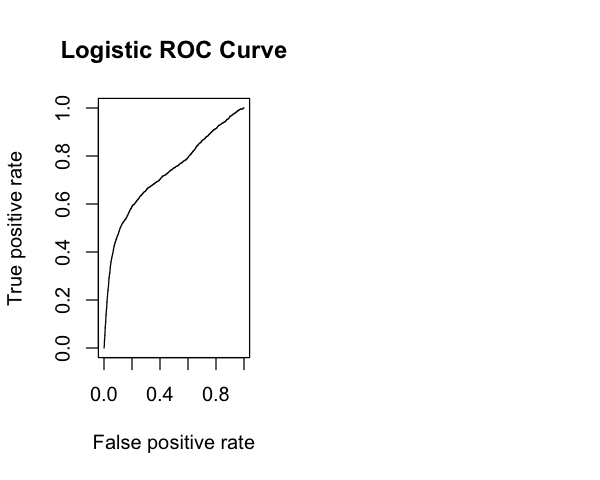

In [103]:
par(mfrow=c(1, 2))
#Plot the results on test data as a ROC curve
prediction(test.predicted.log, test_lasso$default.payment.next.month) %>%
  performance(measure = "tpr", x.measure = "fpr") %>%
  plot()+title('Logistic ROC Curve')

In [104]:
#Calculation of the AUC for the ROC Curve
prediction(test.predicted.log, test_lasso$default.payment.next.month) %>%
  performance(measure = "auc") %>%
  .@y.values

[[1]]
[1] 0.7292685

In [105]:
#Relative confusion matrix for test data predictions, allows to compare with classification model results
table(test_lasso$default.payment.next.month, test.predicted.log > 0.5) %>% prop.table() %>% round(3)

   
    FALSE  TRUE
  0 0.758 0.023
  1 0.165 0.054

In [106]:
#LOSS calculated for logistic model
accuracy_log <- (0.759+0.053)
LOSS_log <- (1-accuracy_log)
LOSS_log

[1] 0.188

In [107]:
accuracy_log

[1] 0.812

In [67]:
#Fit the log model to the all customers after variable selection
finance_lasso$predicted_default_rate <- predict(log_reg, newdata = finance_lasso, type = "response")

In [68]:
head(finance_lasso)

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_5,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,default.payment.next.month,predicted_default_rate
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,20000,24,2,2,-1,-2,3913,0,689,0,0,0,0,2,2,1,1,0.4970551
2,2,120000,26,-1,2,0,0,2682,0,1000,1000,1000,0,2000,2,2,2,1,0.1364402
3,3,90000,34,0,0,0,0,29239,1518,1500,1000,1000,1000,5000,2,2,2,0,0.2042421
4,4,50000,37,0,0,0,0,46990,2000,2019,1200,1100,1069,1000,2,2,1,0,0.2421564
5,5,50000,57,-1,0,-1,0,8617,2000,36681,10000,9000,689,679,1,2,1,0,0.1282873
6,6,50000,37,0,0,0,0,64400,2500,1815,657,1000,1000,800,1,1,2,0,0.2423279


In [108]:
deviance(log_reg)

[1] 16853.11